In [20]:
%matplotlib inline

import matplotlib.pyplot as plt
from nuscenes.nuscenes import NuScenes

nusc = NuScenes(version='v1.0', dataroot='/home/noam/nuscenes/full_data_set', verbose=True)

Loading NuScenes tables for version v1.0...
23 category,
8 attribute,
4 visibility,
64386 instance,
12 sensor,
10200 calibrated_sensor,
2631083 ego_pose,
68 log,
850 scene,
34149 sample,
2631083 sample_data,
1166187 sample_annotation,
4 map,
Done loading in 41.6 seconds.
Reverse indexing ...
Done reverse indexing in 12.8 seconds.


In [21]:
def query_scenes_for_word(word):
    queried_scene_tokens = set([])
    
    for scene in nusc.scene:
        set_phrases = set(scene['description'].split(', '))
        
        set_words = set([])
        for phrase in set_phrases:
            words = phrase.split(' ')
            set_words |= set([w.lower() for w in words])
        
        if word in set_words:
            queried_scene_tokens.add(scene['token'])
            
    return list(queried_scene_tokens)

In [24]:
word_to_query = 'intersection'

list_of_tokens = query_scenes_for_word(word_to_query)
print("# Scenes w/ Phrase %s:  %d"%(word_to_query, len(list_of_tokens)))

# Scenes w/ Phrase intersection:  290


290


Location: singapore-onenorth


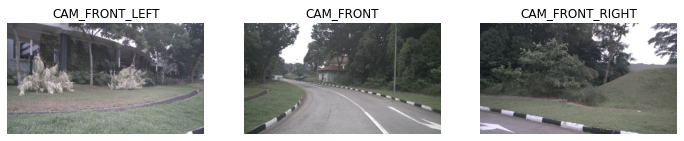

Location: boston-seaport


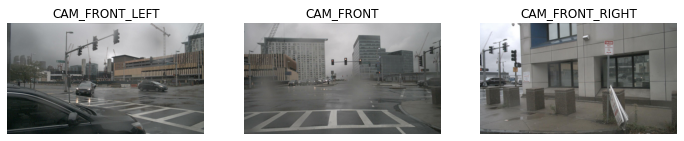

Location: boston-seaport


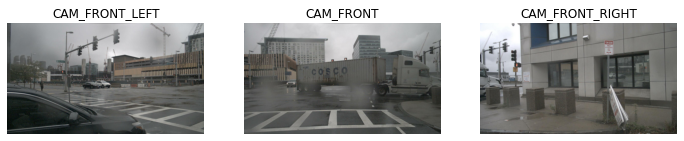

Location: boston-seaport


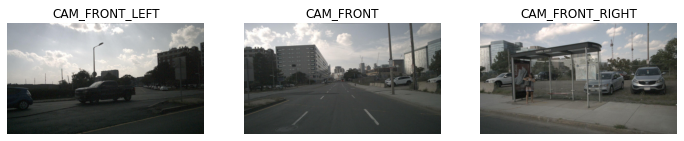

Location: singapore-onenorth


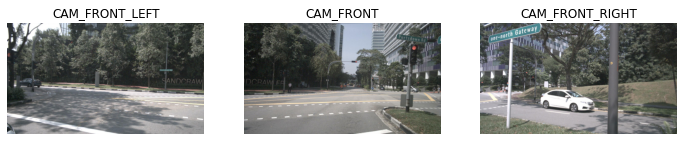

Location: boston-seaport


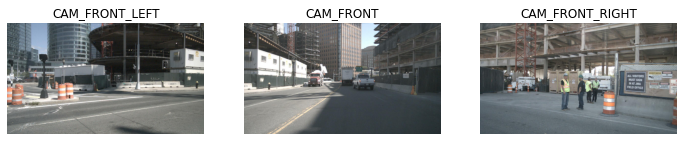

Location: boston-seaport


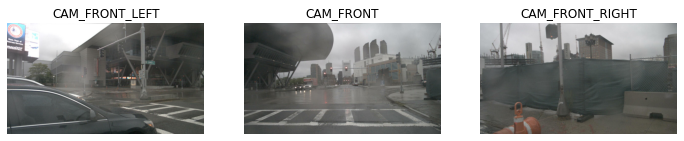

Location: boston-seaport


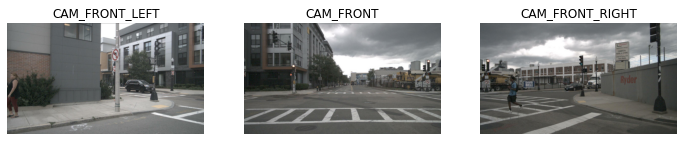

Location: boston-seaport


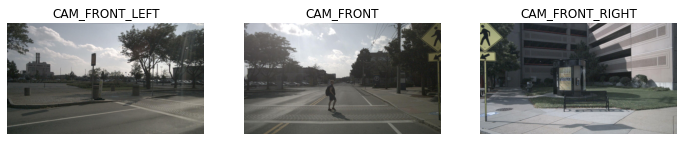

Location: boston-seaport


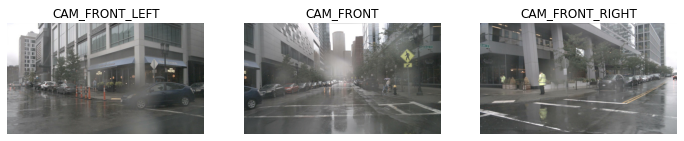

Location: boston-seaport


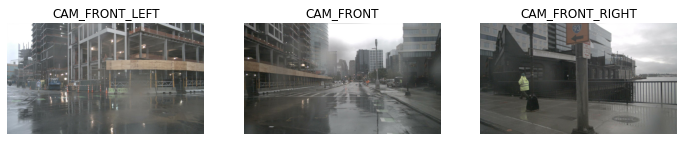

Location: singapore-onenorth


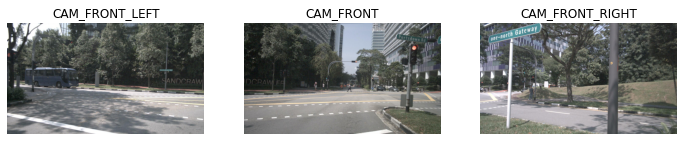

Location: boston-seaport


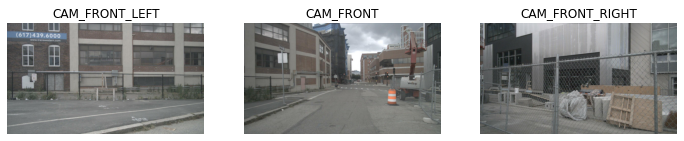

Location: singapore-hollandvillage


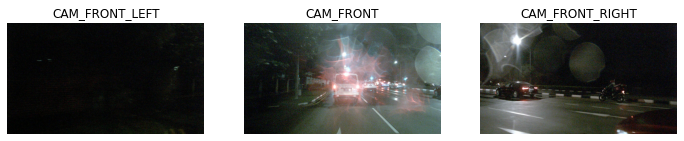

Location: boston-seaport


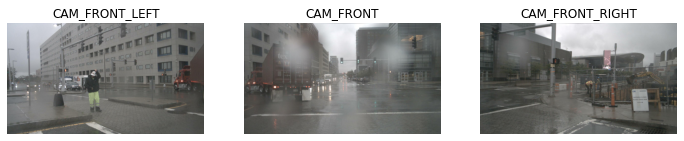

Location: singapore-hollandvillage


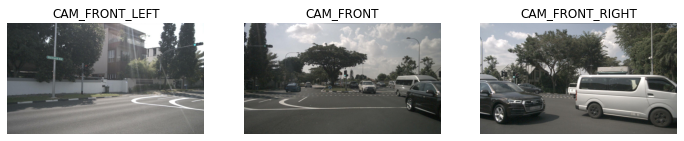

Location: boston-seaport


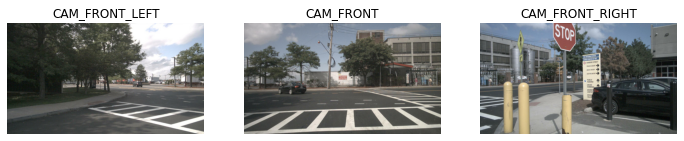

Location: singapore-onenorth


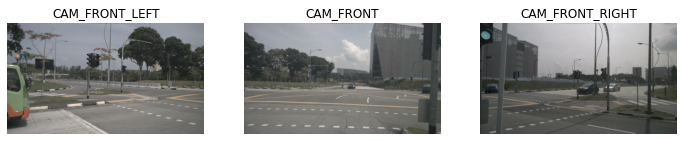

Location: boston-seaport


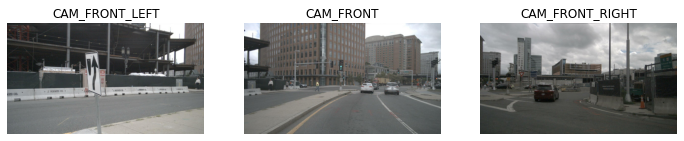

Location: singapore-onenorth


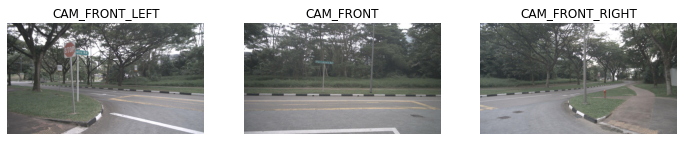

Location: singapore-queenstown


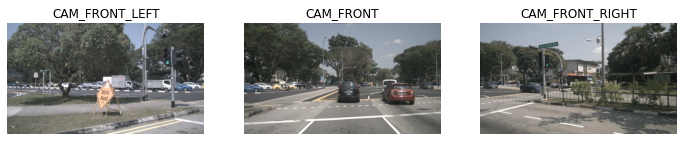

Location: boston-seaport


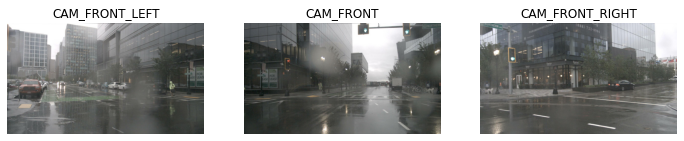

Location: singapore-queenstown


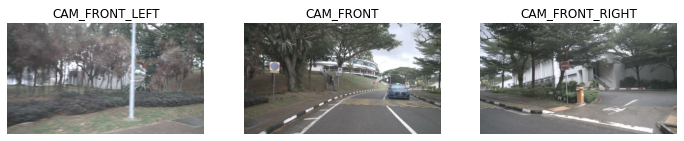

Location: singapore-onenorth


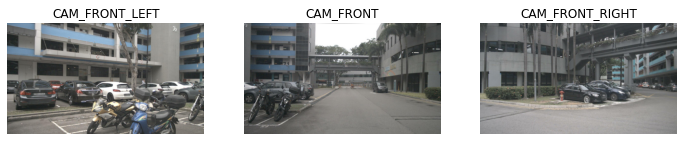

Location: boston-seaport


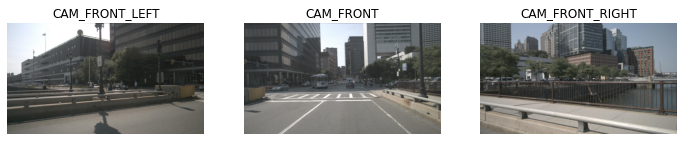

Location: boston-seaport


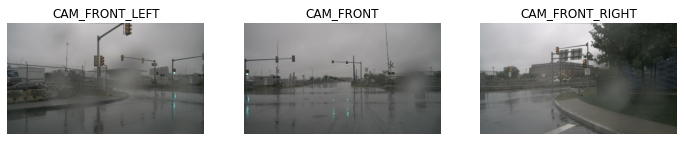

Location: boston-seaport


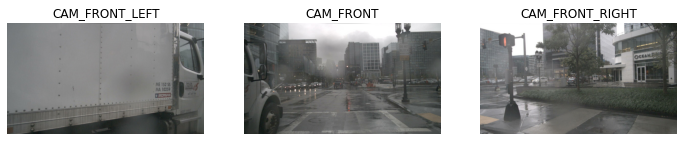

Location: boston-seaport


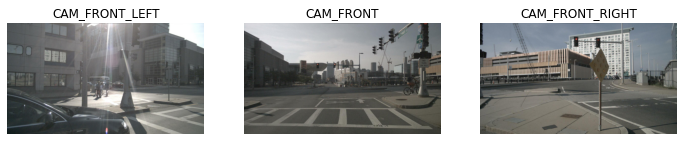

Location: singapore-onenorth


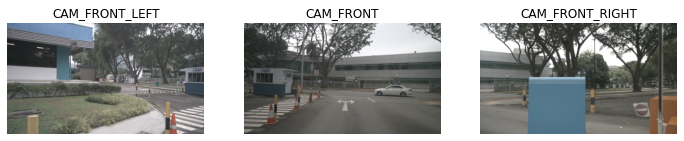

Location: singapore-onenorth


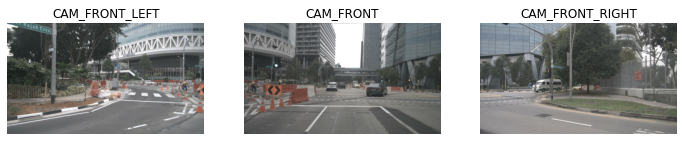

Location: boston-seaport


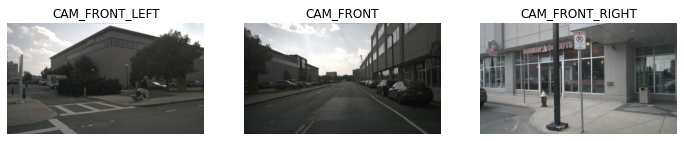

Location: singapore-hollandvillage


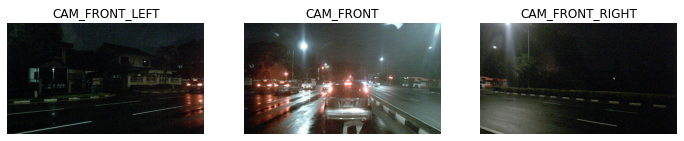

Location: singapore-onenorth


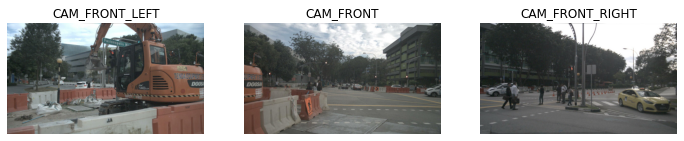

Location: singapore-queenstown


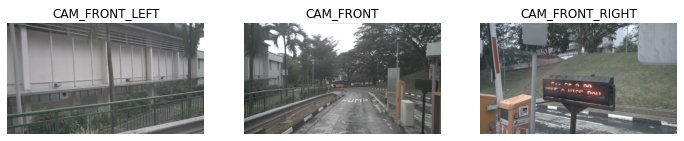

Location: singapore-queenstown


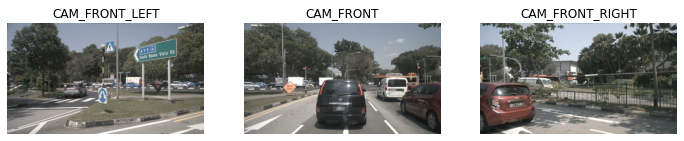

Location: boston-seaport


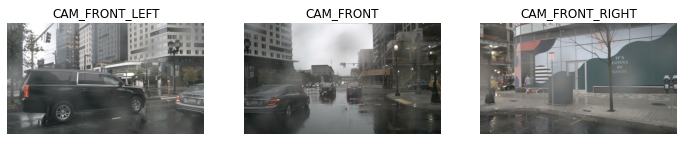

Location: singapore-hollandvillage


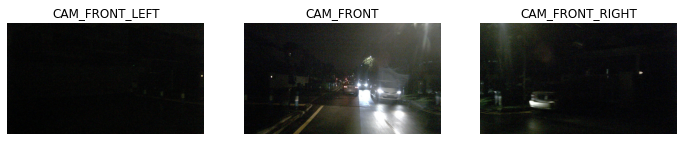

Location: boston-seaport


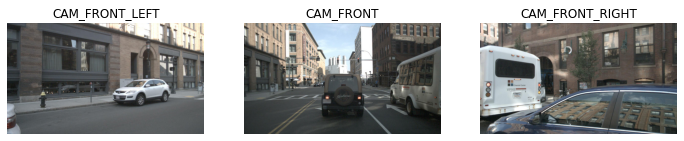

Location: boston-seaport


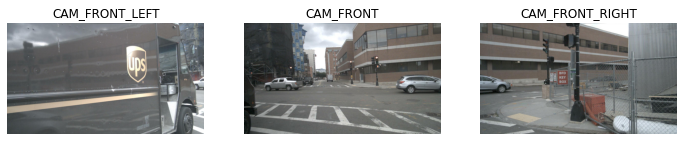

Location: singapore-onenorth


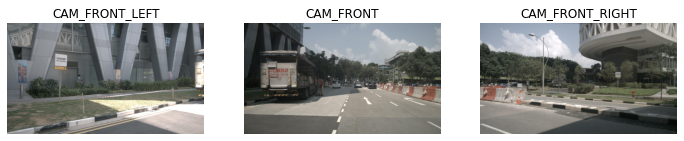

Location: boston-seaport


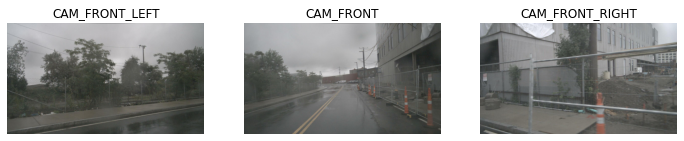

Location: boston-seaport


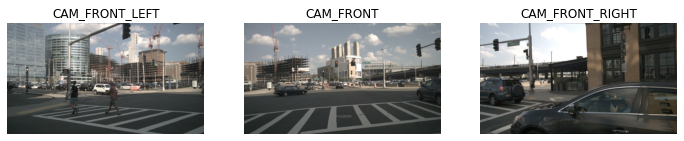

Location: singapore-onenorth


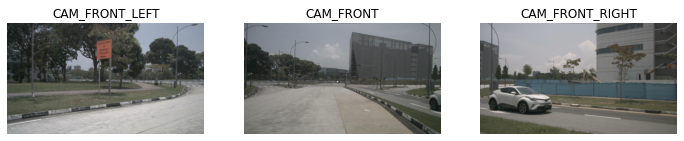

Location: boston-seaport


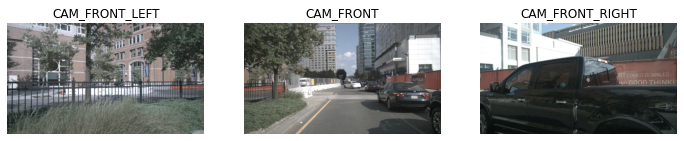

Location: boston-seaport


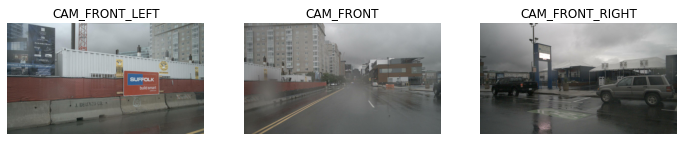

Location: boston-seaport


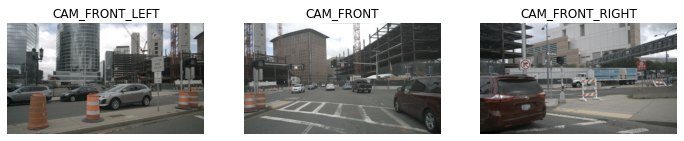

Location: boston-seaport


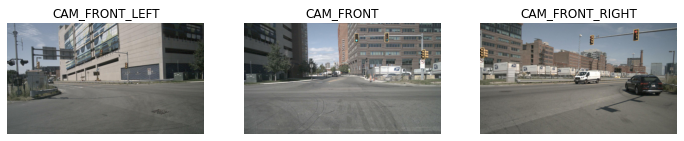

Location: singapore-queenstown


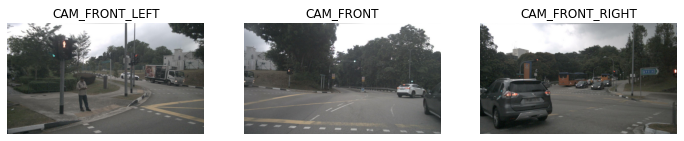

Location: singapore-onenorth


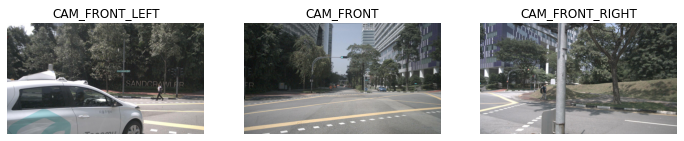

Location: boston-seaport


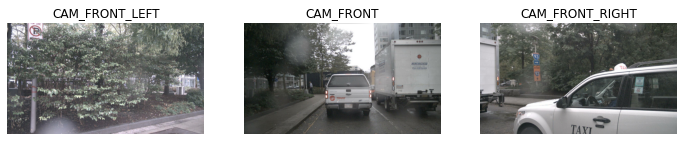

In [25]:
number_scenes_to_show = 50

for scene_token in list_of_tokens[:number_scenes_to_show]:
    scene = nusc.get('scene', scene_token)
    location = nusc.get('log',scene['log_token'])['location']    
    sample = nusc.get('sample', scene['first_sample_token'])
    sensor = 'CAM_FRONT'
    
    cam_front_data = nusc.get('sample_data', sample['data'][sensor])
    cam_fright_data = nusc.get('sample_data', sample['data']['CAM_FRONT_RIGHT'])
    cam_fleft_data = nusc.get('sample_data', sample['data']['CAM_FRONT_LEFT'])
    
    fig, axs = plt.subplots(1, 3, figsize=[12,8])
    print("Location: %s"%(location))
    nusc.render_sample_data(cam_fleft_data['token'], with_anns=False, ax = axs[0])
    nusc.render_sample_data(cam_front_data['token'], with_anns=False, ax = axs[1])
    nusc.render_sample_data(cam_fright_data['token'], with_anns=False, ax = axs[2])
    plt.show()
    